In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy as shc
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture

In [ ]:
#Read CSV file
df = pd.read_csv("/content/Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Customer ID: ID of the customers

Gernre: Gender

Age: Age of the customers

Annual Income: Annual Income of the customers

Spending Score: How often a person spends money in a mall on a scale of 1 to 100


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


There are no null values present in our data and we have only one categorical column - Gender.

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0



*   The minimum value of Spending Score is 1 and maximum value is 99 which means we  don't have 100 score spenders in our data.
*   By looking at mean and std columns, for all the features, the mean is greater than standard deviation, which indicates our data has high variability.




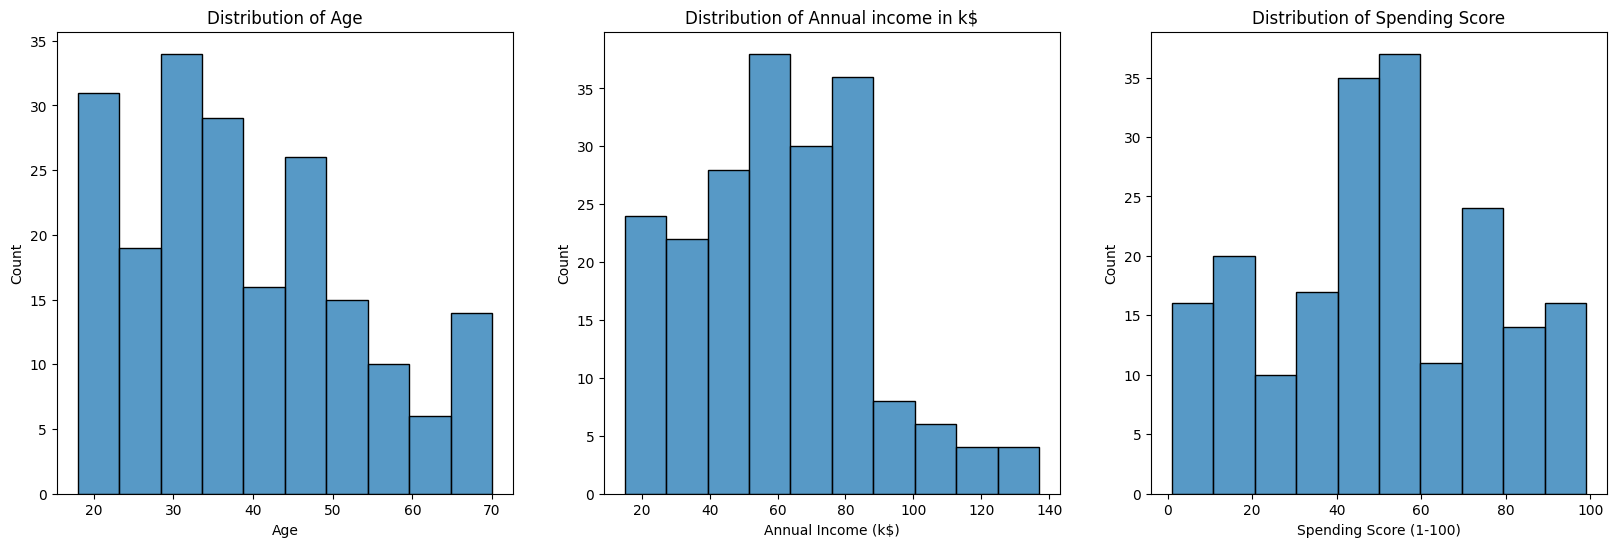

In [ ]:
# Distribution of Age, Annual Income, and Spending Score

plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
sns.histplot(df['Age'], bins=10)
plt.title('Distribution of Age')

plt.subplot(1, 3, 2)
sns.histplot(df['Annual Income (k$)'], bins=10)
plt.title('Distribution of Annual income in k$')

plt.subplot(1, 3, 3)
sns.histplot(df['Spending Score (1-100)'], bins=10)
plt.title('Distribution of Spending Score')


plt.show()



*   There are customers of a wide variety of ages
*   Most of the annual income falls between 50k to 85k
*   The maximum spending score is in the range of 40 to 60





In [ ]:
corr_matrix = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
corr_matrix

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


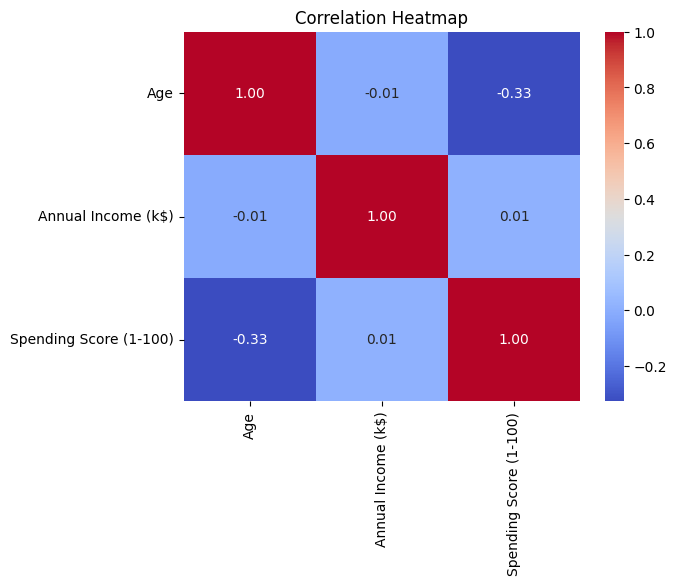

In [ ]:
# Visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')  # 'annot=True' shows correlation coefficients
plt.title('Correlation Heatmap')
plt.show()

Positive Correlation between Annual Income and Spending Score

# Gender Analysis

In [ ]:
gender_counts = df['Gender'].value_counts(normalize=True)
gender_counts

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

More female (56%) customers than male (44%) customers. The difference is 16%  which is balanced enough (close to 50/50) not to cause any trouble.

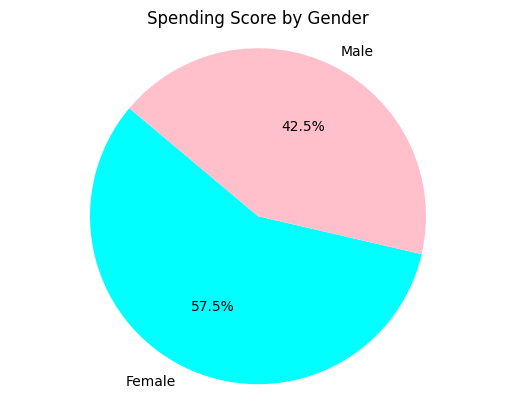

In [ ]:
# Aggregate spending score by gender
gender_spending = df.groupby('Gender')['Spending Score (1-100)'].sum()

# Create pie chart
plt.pie(gender_spending.values, labels=gender_spending.index, colors=['cyan', 'pink'], autopct='%1.1f%%', startangle=140)
plt.title('Spending Score by Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

Female customers are spending more than male customers

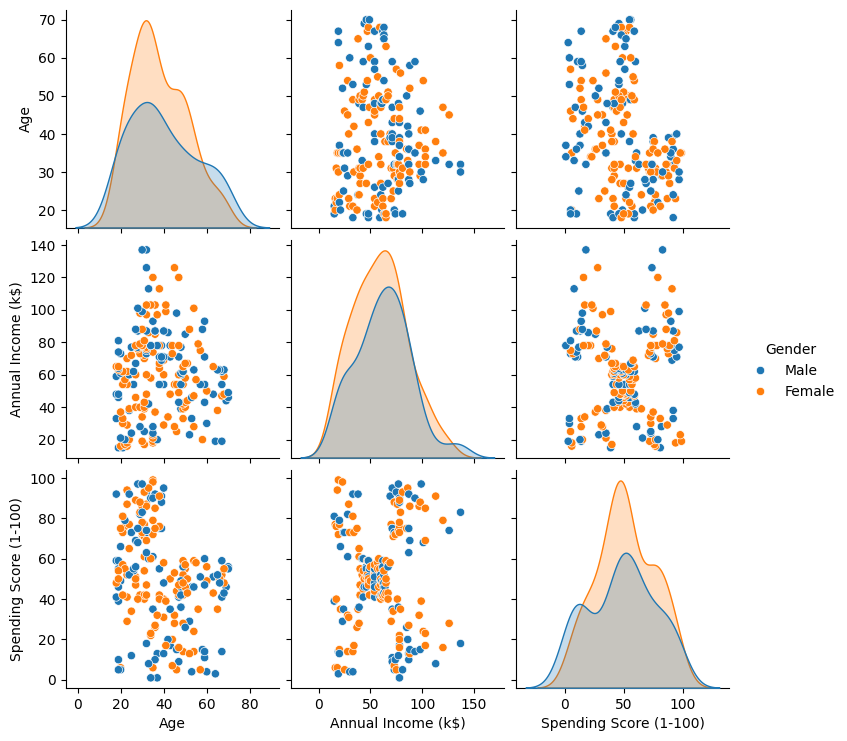

In [ ]:
sns.pairplot(df.drop('CustomerID', axis=1), hue = 'Gender')
plt.show()

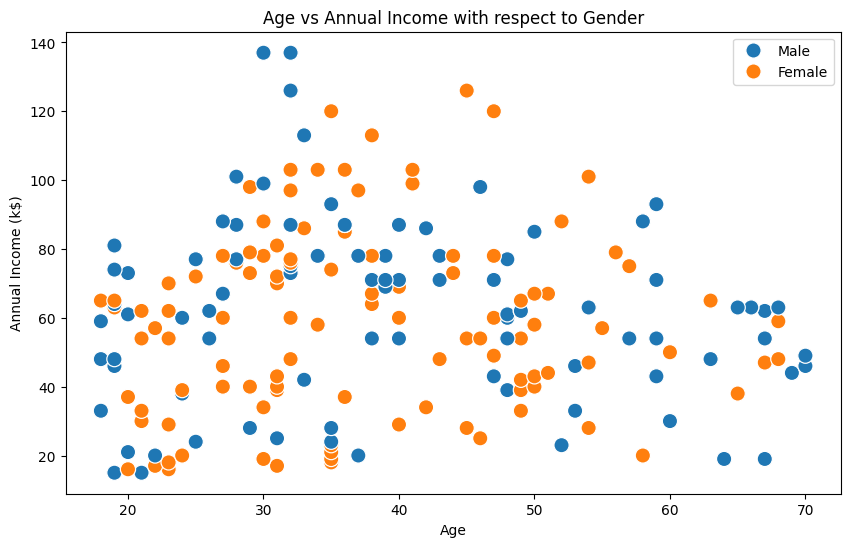

In [ ]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'Age', y = 'Annual Income (k$)', hue = 'Gender', data = df, s = 120)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income with respect to Gender')
plt.legend()
plt.show()

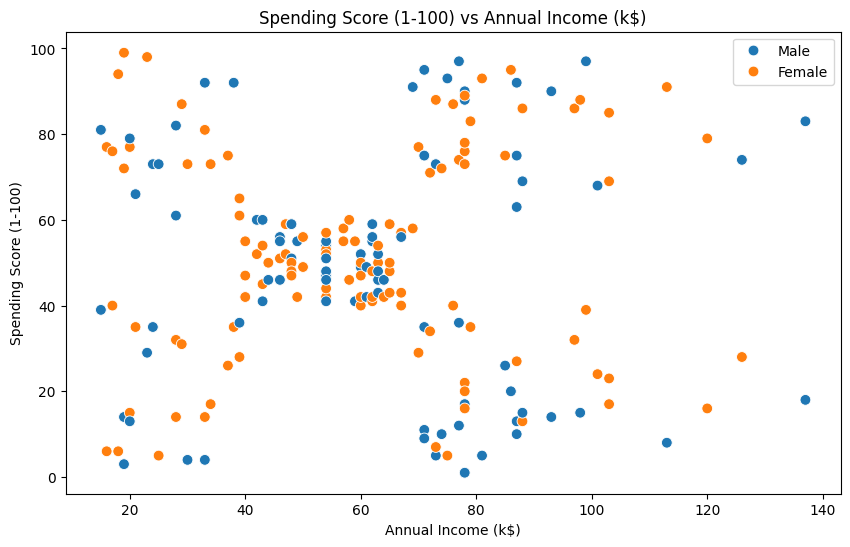

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)'  , hue="Gender",data = df  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.legend()
plt.show()

<ipython-input-13-36016c9460b6>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=income_x, y=income_y, palette="nipy_spectral_r")


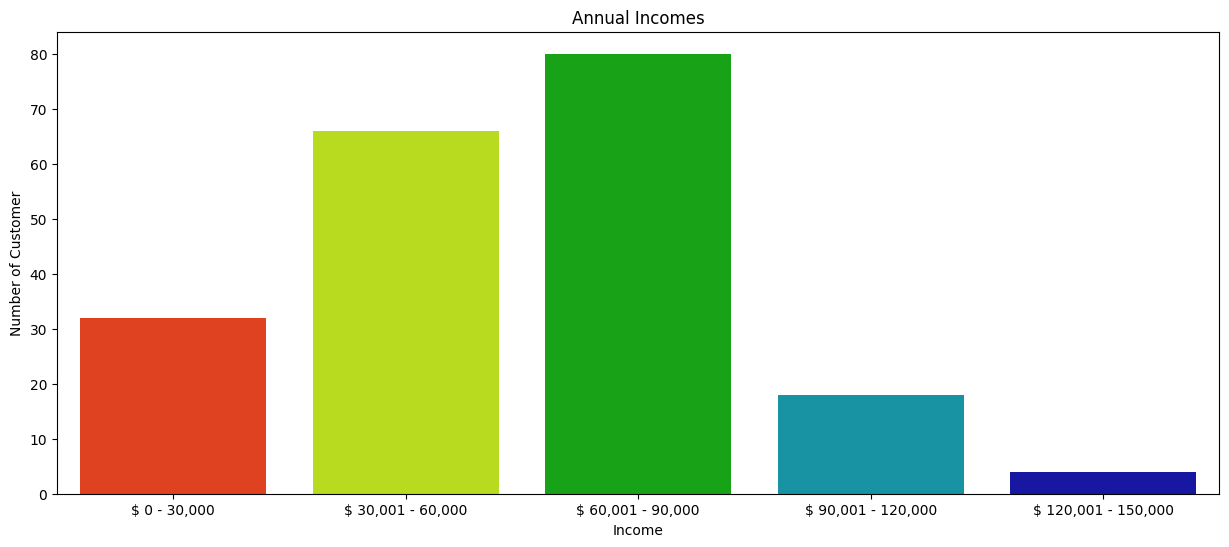

In [ ]:
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

income_x = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
income_y = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=income_x, y=income_y, palette="nipy_spectral_r")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

<ipython-input-14-a3f9aa00c7f3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=score_x, y=score_y,palette="Set2")


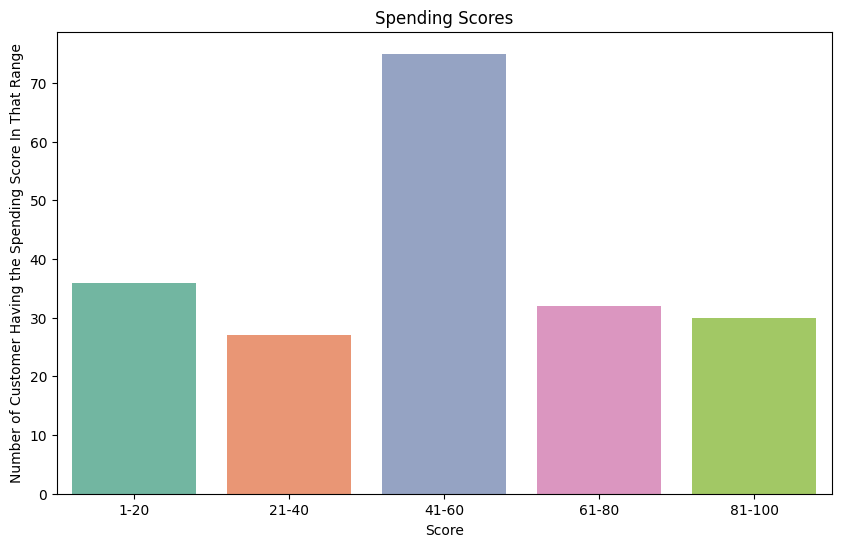

In [ ]:
ss1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

score_x = ["1-20", "21-40", "41-60", "61-80", "81-100"]
score_y = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(10,6))
sns.barplot(x=score_x, y=score_y,palette="Set2")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Spending Score In That Range")
plt.show()

# K-Means Clustering

In [ ]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Elbow Method to determine the number of clusters to be formed:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

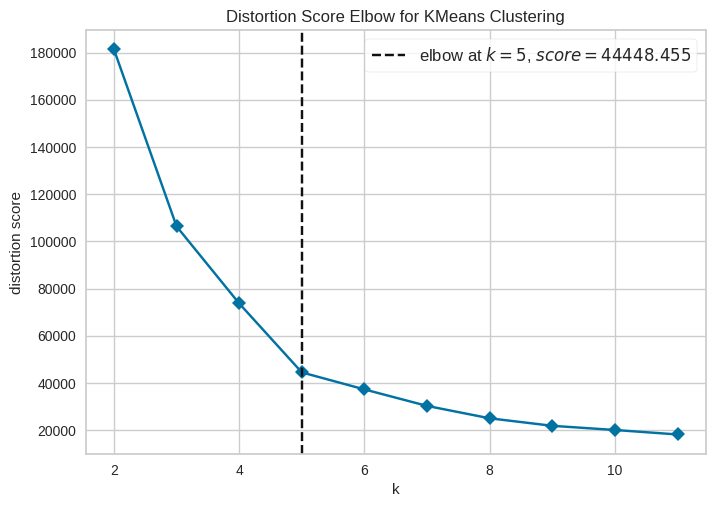

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=11, timings=False)
Elbow_M.fit(X)
Elbow_M.show()

In [ ]:
kmeans=KMeans(n_clusters=5, init = 'k-means++', random_state = 42)
clusters = kmeans.fit_predict(X)
df_clustered1 = df.copy()
df_clustered1['Cluster'] = clusters
df_clustered1.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2


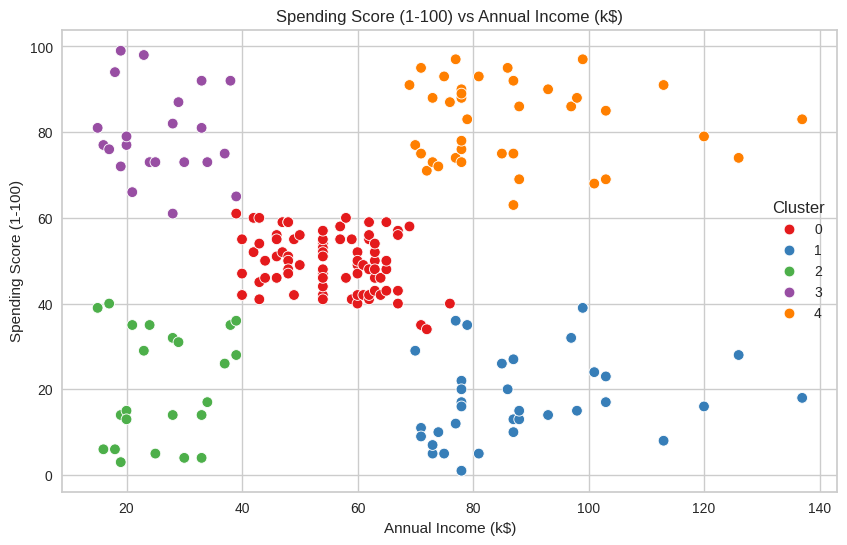

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="Cluster",
                 palette='Set1', data = df_clustered1, s = 60 )

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()



*   Cluster - 0: Annual Income (41k - 70k), Spending Score (42 - 62)
*   Cluster - 1: Annual Income (72k - 137k), Spending Score (1 - 42)
*   Cluster - 2: Annual Income (15k - 40k), Spending Score (10 - 41)
*   Cluster - 3: Annual Income (15k - 40k), Spending Score (62 - 99)
*   Cluster - 4: Annual Income (72k - 137k), Spending Score (62 - 99)

Maximum number of customers fall under Cluster - 0 with annual income 41k - 70k and their spending scores are between 42 and 62. Minimum number of customers fall under Cluster - 2 with annual income between 15k and 40k and spending score in between 10 and 41








In [ ]:
# Group the DataFrame by the 'Cluster' column and calculate the mean and count for each cluster
cluster_stats = df_clustered1.groupby('Cluster').agg({'Annual Income (k$)': 'mean', 'Spending Score (1-100)': 'mean', 'CustomerID': 'count'})

# Rename the columns for clarity
cluster_stats = cluster_stats.rename(columns={'Annual Income (k$)': 'Avg Annual Income (k$)', 'Spending Score (1-100)': 'Avg Spending Score (1-100)', 'CustomerID': 'Count'})

# Display the cluster statistics
print(cluster_stats)

         Avg Annual Income (k$)  Avg Spending Score (1-100)  Count
Cluster                                                           
0                     55.296296                   49.518519     81
1                     88.200000                   17.114286     35
2                     26.304348                   20.913043     23
3                     25.727273                   79.363636     22
4                     86.538462                   82.128205     39


In [ ]:
# Calculate silhouette score
silhouette_avg = silhouette_score(X,kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.553931997444648


# Hierarchical Clustering

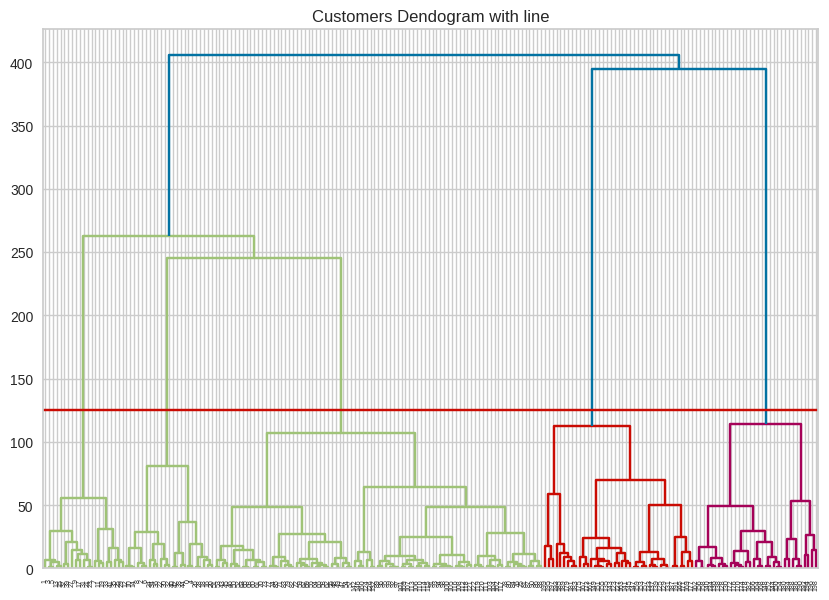

In [ ]:
import scipy.cluster.hierarchy as shc

selected_data = df.iloc[:, 3:5]

plt.figure(figsize=(10, 7))
plt.title("Customers Dendogram with line")
clusters = shc.linkage(selected_data,
            method='ward',
            metric="euclidean")
shc.dendrogram(clusters)
# Add a reference line for potential cluster threshold (y=125)
plt.axhline(y = 125, color = 'r', linestyle = '-')

## Implementing an Agglomerative Hierarchical Clustering

In [ ]:
clustering_model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
clustering_model.fit(selected_data)
clustering_model.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

Text(0.5, 1.0, 'Labeled Customer Data')

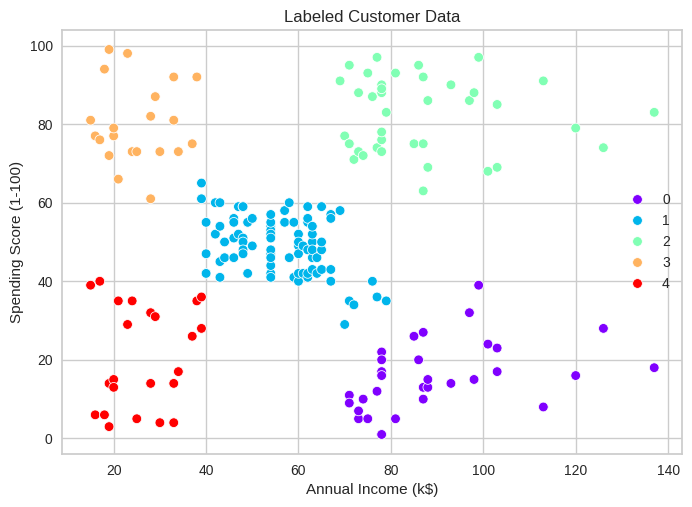

In [ ]:
data_labels = clustering_model.labels_
sns.scatterplot(x='Annual Income (k$)',
                y='Spending Score (1-100)',
                data=selected_data,
                hue=data_labels,
                palette="rainbow").set_title('Labeled Customer Data')

In [ ]:
# Calculate silhouette score
silhouette_avg = silhouette_score(selected_data, clustering_model.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5529945955148897


# Gaussian Mixture Model

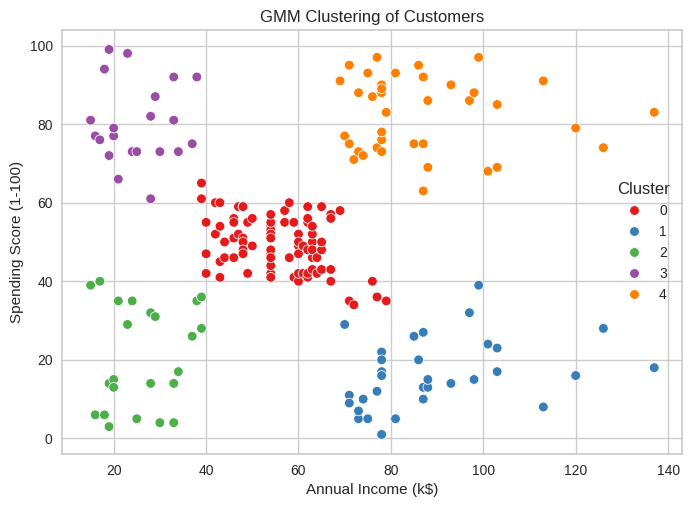

In [ ]:
#Fit a Gaussian Mixture Model (GMM)

gmm = GaussianMixture(n_components=5, random_state=42) # You can adjust the no.of components (Clusters)
gmm.fit(X)

#Assign cluster labels
clusters = gmm.predict(X)

df_clustered2 = df.copy()
#Add cluster labels to the DataFrame
df_clustered2['Cluster'] = clusters

#Visualize the clusters
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df_clustered2, palette='Set1')
plt.title('GMM Clustering of Customers')
plt.show()

*   Cluster - 0: Annual Income (39k - 80k), Spending Score (35 - 65)
*   Cluster - 1: Annual Income (68k - 137k), Spending Score(1 - 40)
*   Cluster - 2: Annual Income (10k - 40k), Spending Score (2 - 41)
*   Cluster - 3: Annual Income (10k - 39k), Spending Score (60 - 100)
*   Cluster - 4: Annual Income (68k - 137k), Spending Score (62 - 98)

Maximum number of customers fall under Cluster - 0 with annual income 39k - 80k and their spending scores are between 35 - 65. Minimum number of customers fall under Cluster - 2 with annual income between 10k - 40k and spending score in between 2 - 41

In [ ]:
# Group the DataFrame by the 'Cluster' column and calculate the mean and count for each cluster
cluster_stats = df_clustered2.groupby('Cluster').agg({'Annual Income (k$)': 'mean', 'Spending Score (1-100)': 'mean', 'CustomerID': 'count'})

# Rename the columns for clarity
cluster_stats = cluster_stats.rename(columns={'Annual Income (k$)': 'Avg Annual Income (k$)', 'Spending Score (1-100)': 'Avg Spending Score (1-100)', 'CustomerID': 'Count'})

# Display the cluster statistics
print(cluster_stats)

         Avg Annual Income (k$)  Avg Spending Score (1-100)  Count
Cluster                                                           
0                     55.642857                   49.369048     84
1                     88.818182                   16.000000     33
2                     26.304348                   20.913043     23
3                     25.095238                   80.047619     21
4                     86.538462                   82.128205     39


In [ ]:
# Calculate silhouette score
silhouette_avg = silhouette_score(X, clusters)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5528243704895652


# Fuzzy C-Mean Clustering

In [ ]:
!pip install -U scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 15.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=dfbf47a829fc86b44accb40a6b26db193656bc6dcf5d1df67395d30b360f9967
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
!pip install fuzzy-c-means

  Attempting uninstall: tabulate
    Found existing installation: tabulate 0.9.0
    Uninstalling tabulate-0.9.0:
      Successfully uninstalled tabulate-0.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.2.0 requires tabulate>=0.9, but you have tabulate 0.8.10 which is incompatible.


In [ ]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [ ]:
from fcmeans import FCM

fcm = FCM(n_clusters=5)
fcm.fit(X.values)

# outputs
fcm_centers = fcm.centers
fcm_labels = fcm.predict(X.values) # cluster determine

In [ ]:
df_clustered3 = df.copy()
df_clustered3['Fuzzy_cluster'] = fcm_labels
df_clustered3.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Fuzzy_cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,1
2,3,Female,20,16,6,2
3,4,Female,23,16,77,1
4,5,Female,31,17,40,2


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

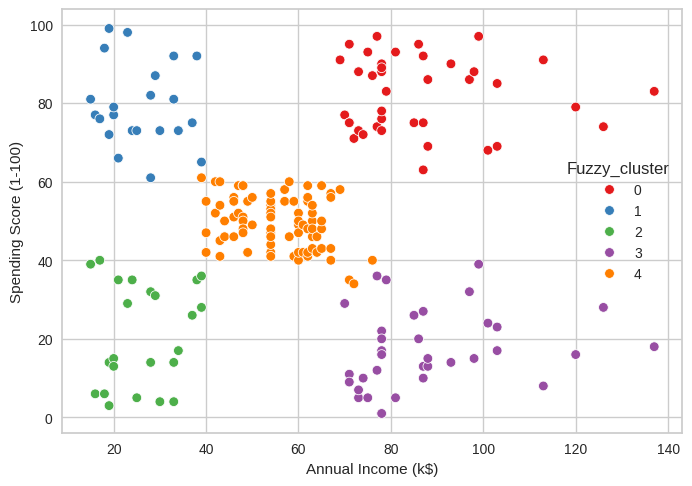

In [ ]:
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="Fuzzy_cluster",
                 palette='Set1', data = df_clustered3)

In [ ]:
# Calculate silhouette score
silhouette_avg = silhouette_score(X,fcm_labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.553931997444648
